In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import category_encoders as ce
from kmodes.kmodes import KModes

In [2]:
df=pd.read_csv("dataset/subscriptions_60000_utf8.csv", low_memory=False)


In [3]:
df.isnull().mean()*100

id                    0.000000
created_at            0.000000
country               0.000000
operator              0.000000
service               0.000000
source               18.771494
msisdn                0.000000
status                0.000000
cycle                 0.001764
adnet                47.507187
revenue               0.000000
subs_date             0.000000
renewal_date          0.058198
freemium_end_date    62.654533
unsubs_from          54.977691
unsubs_date          40.911416
service_price         0.000000
currency             22.475001
profile_status       31.038922
publisher            60.559406
trxid                41.858455
pixel                78.808881
handset              77.159939
browser              66.423293
attempt_charging      0.000000
success_billing       0.000000
dtype: float64

In [4]:
df['operator'].unique()

array(['id-telkomsel-mks', 'telesatpass', 'telkomsel', 'smartfren', 'ltc',
       'tplus', 'etl', 'omantel', 'ooredo', 'linguisto', 'smart',
       'sen-orange-mtarget', 'aisgemezz', 'ais'], dtype=object)

In [4]:
df['unsubs_from']=df['unsubs_from'].fillna('missing')
df['unsubs_date']=df['unsubs_date'].fillna('missing')

In [5]:
df['success_billing']=df['success_billing'].apply(lambda x: 1 if x > 0 else  0)

In [6]:
df['success_billing'].value_counts()

success_billing
0    34310
1    22393
Name: count, dtype: int64

In [7]:
df.isnull().sum()

id                       0
created_at               0
country                  0
operator                 0
service                  0
source               10644
msisdn                   0
status                   0
cycle                    1
adnet                26938
revenue                  0
subs_date                0
renewal_date            33
freemium_end_date    35527
unsubs_from              0
unsubs_date              0
service_price            0
currency             12744
profile_status       17600
publisher            34339
trxid                23735
pixel                44687
handset              43752
browser              37664
attempt_charging         0
success_billing          0
dtype: int64

In [8]:
df['service'].nunique()

40

/tmp/ipykernel_5542/2040844572.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='service', data=engaged_users, order=engaged_users['service'].value_counts().index, palette='viridis')


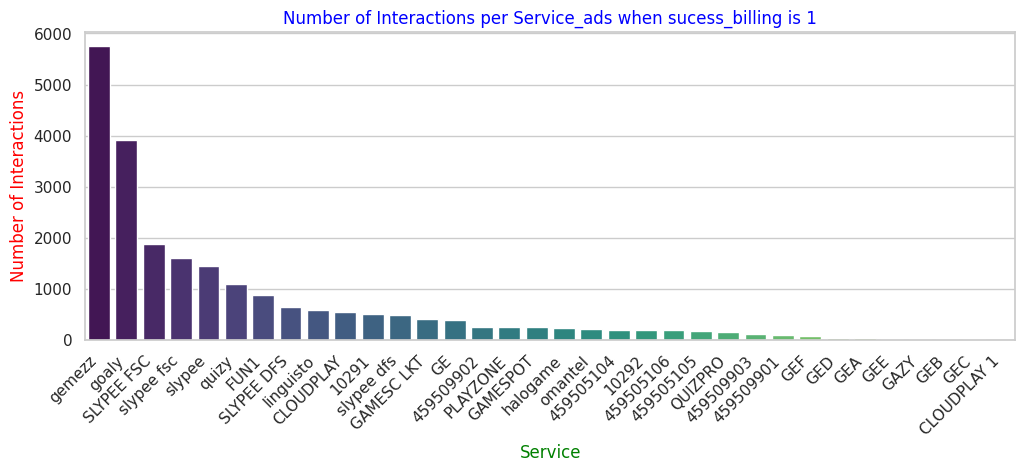

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


engaged_users = df[df['success_billing'] == 1]


sns.set(style="whitegrid")

plt.figure(figsize=(12, 4))


ax = sns.countplot(x='service', data=engaged_users, order=engaged_users['service'].value_counts().index, palette='viridis')
plt.title('Number of Interactions per Service_ads when sucess_billing is 1', color='blue')
ax.set_xlabel('Service', color='green')
ax.set_ylabel('Number of Interactions', color='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


In [10]:
import pandas as pd


df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')


In [11]:
df['revenue'].unique()

array([  1000,   8000,      0,   2000,  10000,   4000,  12000,   6000,
        14000,  22000,   3000,  64000,  30000,  20000,  24000,  58000,
        16000,  18000,  32000,  26000,  28000,  36000,  40000,  60000,
        46000,  48000,  34000,  38000,  50000,  76000,   7000,  31000,
        29000,  25000, 117000,   5000,  17000,  43000,   9000,  11000,
        45000,  33000,  62000,  35000,  23000,  54000,  98000,  80000,
       114000,  68000,  13000,  77000,  37000,  59000,  67000,  51000,
        53000,  44000,  78000, 103000, 189000,  94000,  89000, 113000,
        21000,  19000,  93000,  27000, 122000,  39000,  65000,  63000,
       238000,  49000, 135000, 124000,  88000,  56000, 247000,  82000,
        92000,  55000,  70000, 128000,  42000,  15000,  96000, 108000,
       166000, 111000, 164000,  74000, 288000,  83000, 148000, 130000,
       120000, 251000, 116000,  52000,  66000,  84000, 100000, 102000,
       142000, 121000,  97000, 143000, 105000,  57000,  41000, 139000,
      

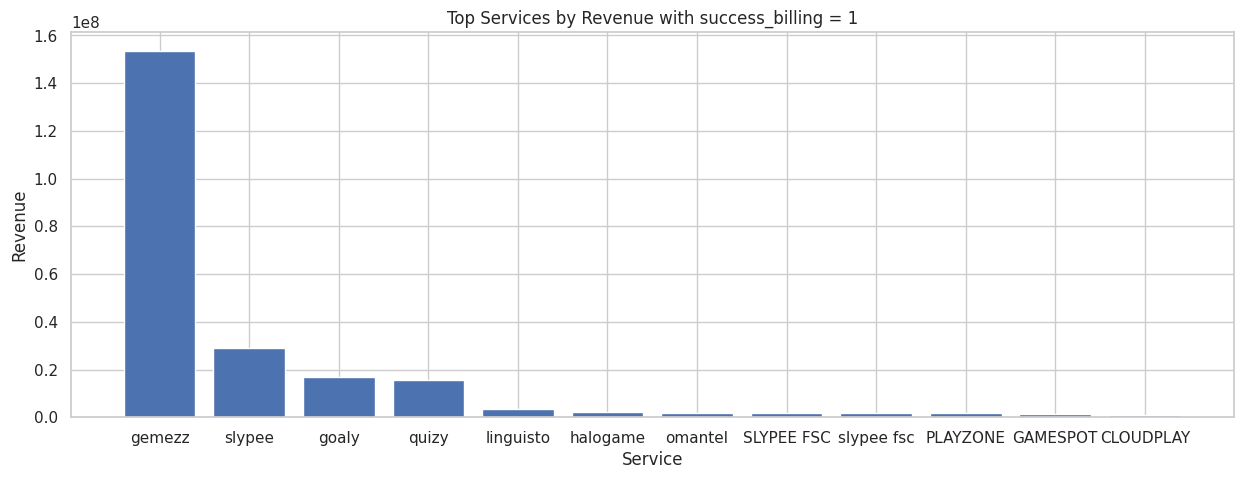

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the DataFrame based on success_billing
df_success = df[df['success_billing'] == 1]

# Group by service and calculate the sum of revenue for each service
grouped_df = df_success.groupby('service')['revenue'].sum().reset_index()

# Sort the DataFrame by revenue in descending order and take the top 8
top_services = grouped_df.sort_values(by='revenue', ascending=False).head(12)

# Increase the figure size
plt.figure(figsize=(15, 5))

# Plotting the bar graph
plt.bar(top_services['service'], top_services['revenue'])
plt.xlabel('Service')
plt.ylabel('Revenue')
plt.title('Top Services by Revenue with success_billing = 1')
plt.show()


In [13]:
df['source']=df['source'].str.lower()

In [14]:
mode_value=df['source'].mode()[0]
mode_value

'sms'

In [15]:
df['source']=df['source'].fillna(mode_value)

In [16]:
df['source'].isnull().sum()

0

In [17]:
df['profile_status']=df['profile_status'].str.lower()

In [18]:
ps_mode_val=df['profile_status'].mode()[0]

In [19]:
df['profile_status']=df['profile_status'].fillna(ps_mode_val)

In [20]:
df['service']=df['service'].str.lower()

In [21]:
df['publisher']=df['publisher'].fillna('unknown')

In [22]:
df['publisher']=df['publisher'].str.lower()

In [23]:
df['adnet']=df['adnet'].str.lower()

In [24]:
df['adnet']=df['adnet'].fillna('missing')

In [25]:
df.isnull().sum()

id                       0
created_at               0
country                  0
operator                 0
service                  0
source                   0
msisdn                   0
status                   0
cycle                    1
adnet                    0
revenue                  0
subs_date                0
renewal_date            33
freemium_end_date    35527
unsubs_from              0
unsubs_date              0
service_price            0
currency             12744
profile_status           0
publisher                0
trxid                23735
pixel                44687
handset              43752
browser              37664
attempt_charging         0
success_billing          0
dtype: int64

In [26]:
mode_value=df['renewal_date'].mode()[0]
mode_value

'2023-11-15 07:00:00.000 +0700'

In [27]:
df['renewal_date']=df['renewal_date'].fillna(mode_value)

In [28]:
df['renewal_date'].value_counts()

renewal_date
2023-11-15 07:00:00.000 +0700    6771
2023-10-04 00:00:00              3276
2023-09-01 00:00:00              2674
2023-12-12 07:00:00.000 +0700    2617
2023-12-13 00:00:00              2588
                                 ... 
2023-10-28 06:20:06.000 +0700       1
2023-10-03 05:38:40.000 +0700       1
2023-11-17 23:08:05.000 +0700       1
2023-11-30 12:49:38.000 +0700       1
2023-12-12 10:50:48.000 +0700       1
Name: count, Length: 32423, dtype: int64

In [29]:
mode_val=df['cycle'].mode()[0]
df['cycle']=df['cycle'].fillna(mode_val)

In [30]:
df['service'].unique()

array(['slypee fsc', 'playzone', 'slypee dfs', 'cloudplay', 'gamespot',
       'fun1', 'quizpro', 'gamesc lkt', 'gazy', 'cloudplay 1', 'gmspaze',
       'galays', 'gemezz', 'quizy', 'slypee', 'halogame', 'goaly',
       'linguisto', 'omantel', '10291', '10292', '9109', 'ge',
       '459509902', '459505105', '459505104', '459505106', '459509903',
       '459509901', 'gee', 'ged', 'gea', 'ge7', 'gef', 'ge7a', 'gec',
       'geb', 'ge1'], dtype=object)

In [31]:
# df['success_billing'] = df['success_billing'].apply(lambda x: 1 if x > 1 else 0)
df['success_billing'] = (df['success_billing'] > 1).astype(int)


In [33]:
selected_features=['unsubs_from','unsubs_date', 'revenue', 'subs_date', 'source','country', 
                   'operator','profile_status','status', 'service_price', 'publisher'
                   ,'adnet','service', 'success_billing']
save_features=df[selected_features]
save_features.to_csv('RFC_FEATURES.csv', index=False)

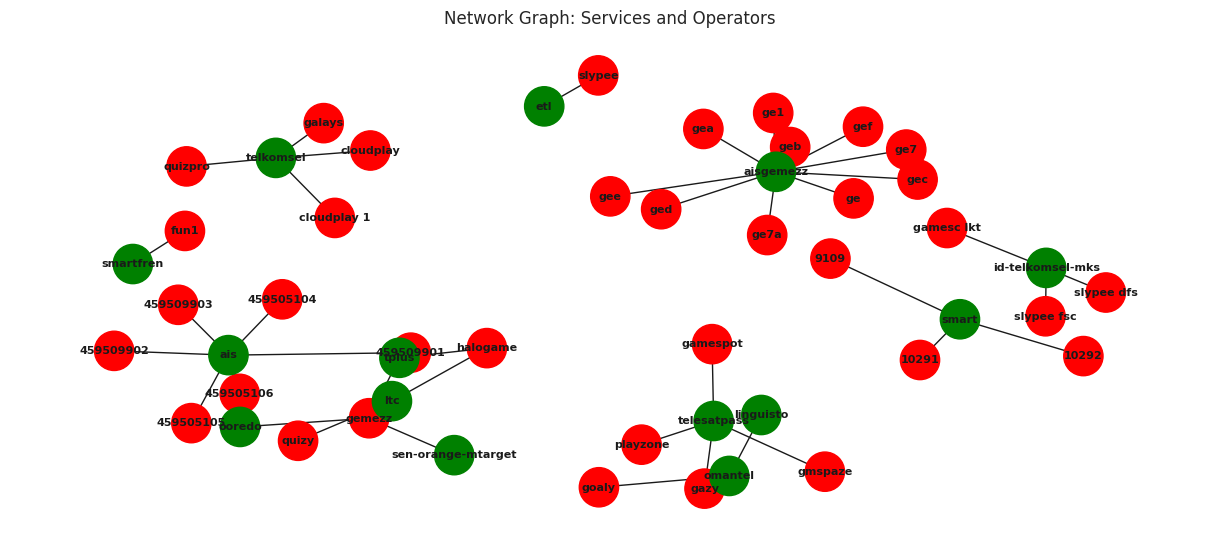

In [68]:
import networkx as nx
import matplotlib.pyplot as plt


services = df['service'].unique()
operators = df['operator'].unique()


G = nx.Graph()

G.add_nodes_from(services, label='service', color='red')
G.add_nodes_from(operators, label='operator', color='green')


for _, row in df[['service', 'operator']].iterrows():
    G.add_edge(row['service'], row['operator'])


pos = nx.spring_layout(G, k=0.4) 
node_colors = [G.nodes[node]['color'] for node in G.nodes]

# Set a larger figure size
plt.figure(figsize=(12, 5))

# Draw the network graph
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=node_colors, node_size=800, font_size=8)

plt.title('Network Graph: Services and Operators')
plt.show()


In [82]:
df['service'].unique()

array(['slypee fsc', 'playzone', 'slypee dfs', 'cloudplay', 'gamespot',
       'fun1', 'quizpro', 'gamesc lkt', 'gazy', 'cloudplay 1', 'gmspaze',
       'galays', 'gemezz', 'quizy', 'slypee', 'halogame', 'goaly',
       '10291', '10292', '9109', 'ge', '459509902', '459505105',
       '459505104', '459505106', '459509903', '459509901', 'gee', 'ged',
       'gea', 'ge7', 'gef', 'ge7a', 'gec', 'geb', 'ge1'], dtype=object)

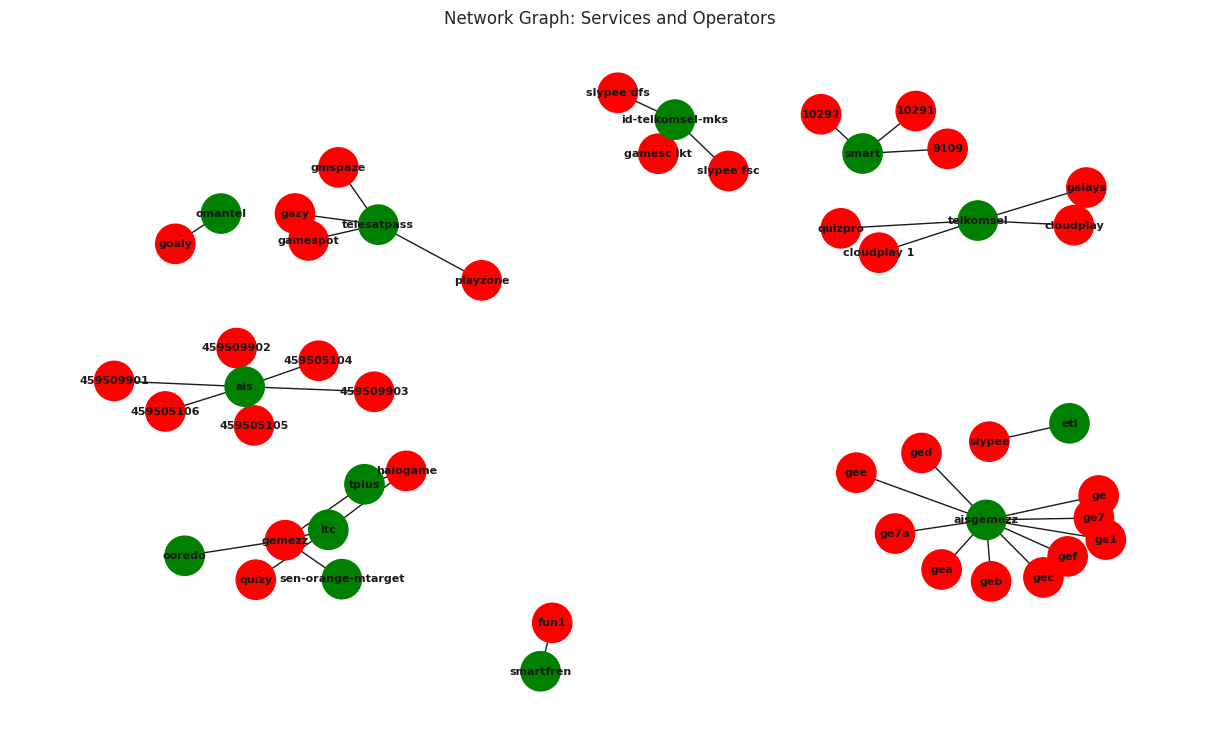

In [86]:
import networkx as nx
import matplotlib.pyplot as plt


services = df['service'].unique()
operators = df['operator'].unique()

# Create a graph
G = nx.Graph()

rs
G.add_nodes_from(services, label='service', color='red')
G.add_nodes_from(operators, label='operator', color='green')

for _, row in df[['service', 'operator']].iterrows():
    G.add_edge(row['service'], row['operator'])


pos = nx.spring_layout(G, k=0.3) 
node_colors = [G.nodes[node]['color'] for node in G.nodes]


plt.figure(figsize=(12, 7))

# Draw the network graph
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=node_colors, node_size=800, font_size=8)

plt.title('Network Graph: Services and Operators')
plt.show()


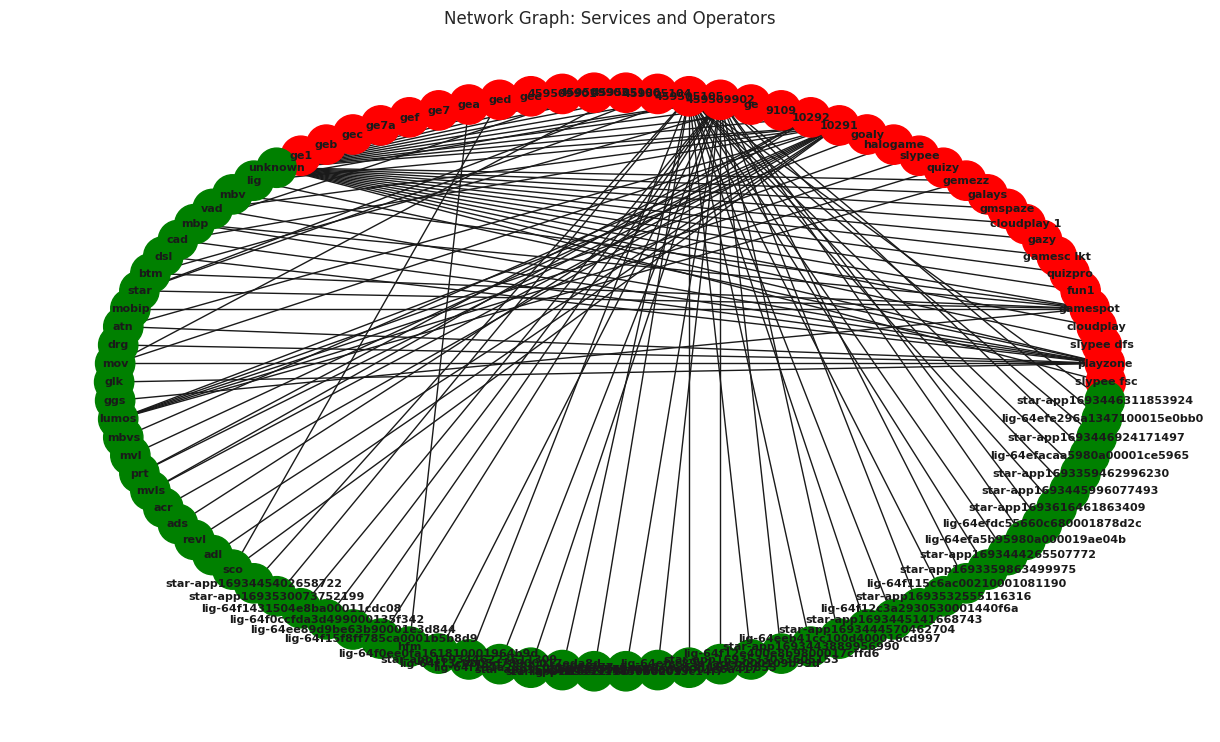

In [84]:
import networkx as nx
import matplotlib.pyplot as plt

countries = df['service'].unique()
sources = df['publisher'].unique()

# Create a graph
G = nx.Graph()

# Add nodes for countries and sources with different colors
G.add_nodes_from(countries, label='service', color='red')
G.add_nodes_from(sources, label='operator', color='green')

# Iterate through the DataFrame and add edges
for _, row in df[['service', 'publisher']].iterrows():
    G.add_edge(row['service'], row['publisher'])

# Plot the network graph with a circular layout
pos = nx.circular_layout(G)
node_colors = [G.nodes[node]['color'] for node in G.nodes]

# Set a larger figure size
plt.figure(figsize=(12, 7))

# Draw the network graph
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=node_colors, node_size=800, font_size=8)

plt.title('Network Graph: Services and Operators')
plt.show()


In [36]:
df.isnull().sum()

id                       0
created_at               0
country                  0
operator                 0
service                  0
source                   0
msisdn                   0
status                   0
cycle                    0
adnet                    0
revenue                  0
subs_date                0
renewal_date             0
freemium_end_date    35527
unsubs_from              0
unsubs_date              0
service_price            0
currency             12744
profile_status           0
publisher                0
trxid                23735
pixel                44687
handset              43752
browser              37664
attempt_charging         0
success_billing          0
dtype: int64

In [37]:
#KMode clustering


In [38]:
df['profile_status'].value_counts()

profile_status
active      43199
grace        8103
inactive     3157
unsub        1522
purge         676
true           44
false           2
Name: count, dtype: int64

In [39]:
#country, operator and status segementations 
df['Active_Operators(users)'] = df['operator'] + '-' + df['profile_status']

In [40]:
Kmode_features=df[['Active_Operators(users)','service', 'source', 'country', 'publisher', 'adnet']]

In [41]:
Kmode_features.isnull().sum()

Active_Operators(users)    0
service                    0
source                     0
country                    0
publisher                  0
adnet                      0
dtype: int64

In [42]:

# df['success_billing'] = df['success_billing'].apply(lambda x: 1 if x > 1 else 0)
df['success_billing'] = (df['success_billing'] > 1).astype(int)


In [43]:
df_encoded = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'O' else x)

In [44]:
def implement_Clustering(Kmode_features, number_clusters):
    # Initialize the K-Modes model
    km_instance = KModes(number_clusters, init='Huang', n_init=5, verbose=1, random_state=42)
    
    clusters=km_instance.fit_predict(Kmode_features)
    Kmode_features.loc[:, 'clusters_assignments'] = clusters

    return Kmode_features

number_clusters=10
result=implement_Clustering(Kmode_features, number_clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 741, cost: 75010.0
Run 1, iteration: 2/100, moves: 409, cost: 75010.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11840, cost: 60290.0
Run 2, iteration: 2/100, moves: 2724, cost: 59728.0
Run 2, iteration: 3/100, moves: 333, cost: 59728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3808, cost: 60140.0
Run 3, iteration: 2/100, moves: 0, cost: 60140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4194, cost: 53953.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9317, cost: 72387.0
Run 5, iteration: 2/100, moves: 30, cost: 72387.0
Best run was number 4


/tmp/ipykernel_5542/628366627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kmode_features.loc[:, 'clusters_assignments'] = clusters


In [45]:
import pandas as pd

def get_cluster_characteristics(cluster_data):
    cluster_characteristics = pd.DataFrame(index=cluster_data.columns[:-1]) 
    for cluster_id in range(number_clusters):
        cluster_subset = cluster_data[cluster_data['clusters_assignments'] == cluster_id].drop('clusters_assignments', axis=1)
        dominant_values = cluster_subset.mode().iloc[0]  
        cluster_characteristics[f'Cluster_{cluster_id}'] = dominant_values

    return cluster_characteristics


result_characteristics = get_cluster_characteristics(result)


result_characteristics


,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
Active_Operators(users),sen-orange-mtarget-active,telkomsel-active,id-telkomsel-mks-active,etl-inactive,ais-active,ais-active,sen-orange-mtarget-active,tplus-active,smart-grace,omantel-active
service,gemezz,cloudplay,slypee fsc,slypee,ge,459505105,gemezz,gemezz,10291,goaly
source,sms,wap,sms,lp3,sms,sms,web,cp1,sms,cp1
country,SN,ID,ID,LA,TH,TH,SN,LA,PH,OM
publisher,unknown,unknown,unknown,lumos,unknown,unknown,unknown,lumos,unknown,lumos
adnet,missing,adn,missing,lig,missing,missing,missing,marvel,missing,fmd


In [46]:
import pandas as pd
from IPython.display import display

def get_cluster_characteristics(cluster_data, cluster_id):
    cluster_subset = cluster_data[cluster_data['clusters_assignments'] == cluster_id].drop('clusters_assignments', axis=1)
    dominant_values = cluster_subset.mode().iloc[0]  
    cluster_characteristics = pd.DataFrame({'Category': dominant_values.index, 'Dominant_Value': dominant_values.values})
    return cluster_characteristics


for cluster_id in range(number_clusters):
    result_characteristics = get_cluster_characteristics(result, cluster_id)

r
    display(result_characteristics)
    print("\n")


,Category,Dominant_Value
0,Active_Operators(users),sen-orange-mtarget-active
1,service,gemezz
2,source,sms
3,country,SN
4,publisher,unknown
5,adnet,missing


,Category,Dominant_Value
0,Active_Operators(users),telkomsel-active
1,service,cloudplay
2,source,wap
3,country,ID
4,publisher,unknown
5,adnet,adn


,Category,Dominant_Value
0,Active_Operators(users),id-telkomsel-mks-active
1,service,slypee fsc
2,source,sms
3,country,ID
4,publisher,unknown
5,adnet,missing


,Category,Dominant_Value
0,Active_Operators(users),etl-inactive
1,service,slypee
2,source,lp3
3,country,LA
4,publisher,lumos
5,adnet,lig


,Category,Dominant_Value
0,Active_Operators(users),ais-active
1,service,ge
2,source,sms
3,country,TH
4,publisher,unknown
5,adnet,missing


,Category,Dominant_Value
0,Active_Operators(users),ais-active
1,service,459505105
2,source,sms
3,country,TH
4,publisher,unknown
5,adnet,missing


,Category,Dominant_Value
0,Active_Operators(users),sen-orange-mtarget-active
1,service,gemezz
2,source,web
3,country,SN
4,publisher,unknown
5,adnet,missing


,Category,Dominant_Value
0,Active_Operators(users),tplus-active
1,service,gemezz
2,source,cp1
3,country,LA
4,publisher,lumos
5,adnet,marvel


,Category,Dominant_Value
0,Active_Operators(users),smart-grace
1,service,10291
2,source,sms
3,country,PH
4,publisher,unknown
5,adnet,missing


,Category,Dominant_Value
0,Active_Operators(users),omantel-active
1,service,goaly
2,source,cp1
3,country,OM
4,publisher,lumos
5,adnet,fmd


In [47]:
import pandas as pd
from IPython.display import display

def get_cluster_characteristics(cluster_data, cluster_id):
    cluster_subset = cluster_data[cluster_data['clusters_assignments'] == cluster_id].drop('clusters_assignments', axis=1)
    dominant_values = cluster_subset.mode().iloc[0]
    cluster_characteristics = pd.DataFrame({'Category': dominant_values.index, 'Dominant_Value': dominant_values.values})
    return cluster_characteristics


for cluster_id in range(number_clusters):
    result_characteristics = get_cluster_characteristics(result, cluster_id)

  
    display(pd.DataFrame({f'Cluster {cluster_id} Characteristics': []}))
    display(result_characteristics)
    print("\n")


,Cluster 0 Characteristics


,Category,Dominant_Value
0,Active_Operators(users),sen-orange-mtarget-active
1,service,gemezz
2,source,sms
3,country,SN
4,publisher,unknown
5,adnet,missing


,Cluster 1 Characteristics


,Category,Dominant_Value
0,Active_Operators(users),telkomsel-active
1,service,cloudplay
2,source,wap
3,country,ID
4,publisher,unknown
5,adnet,adn


,Cluster 2 Characteristics


,Category,Dominant_Value
0,Active_Operators(users),id-telkomsel-mks-active
1,service,slypee fsc
2,source,sms
3,country,ID
4,publisher,unknown
5,adnet,missing


,Cluster 3 Characteristics


,Category,Dominant_Value
0,Active_Operators(users),etl-inactive
1,service,slypee
2,source,lp3
3,country,LA
4,publisher,lumos
5,adnet,lig


,Cluster 4 Characteristics


,Category,Dominant_Value
0,Active_Operators(users),ais-active
1,service,ge
2,source,sms
3,country,TH
4,publisher,unknown
5,adnet,missing


,Cluster 5 Characteristics


,Category,Dominant_Value
0,Active_Operators(users),ais-active
1,service,459505105
2,source,sms
3,country,TH
4,publisher,unknown
5,adnet,missing


,Cluster 6 Characteristics


,Category,Dominant_Value
0,Active_Operators(users),sen-orange-mtarget-active
1,service,gemezz
2,source,web
3,country,SN
4,publisher,unknown
5,adnet,missing


,Cluster 7 Characteristics


,Category,Dominant_Value
0,Active_Operators(users),tplus-active
1,service,gemezz
2,source,cp1
3,country,LA
4,publisher,lumos
5,adnet,marvel


,Cluster 8 Characteristics


,Category,Dominant_Value
0,Active_Operators(users),smart-grace
1,service,10291
2,source,sms
3,country,PH
4,publisher,unknown
5,adnet,missing


,Cluster 9 Characteristics


,Category,Dominant_Value
0,Active_Operators(users),omantel-active
1,service,goaly
2,source,cp1
3,country,OM
4,publisher,lumos
5,adnet,fmd


In [48]:
import pandas as pd

def cluster_aggregates_calculation(Kmode_features):
   
    clustered_groups = Kmode_features.groupby('clusters_assignments')
    aggregates = {}
    for attribute in Kmode_features.columns:
        if attribute != 'clusters_assignments':
            mode = clustered_groups[attribute].agg(lambda x: x.mode().iloc[0])
            aggregates[attribute] = mode


    aggregates_df = pd.DataFrame(aggregates)

    
    cluster_sizes = clustered_groups.size()
    aggregates_df['Cluster_Size'] = cluster_sizes

    return aggregates_df

aggregates_df = cluster_aggregates_calculation(result)  
aggregates_df

,Active_Operators(users),service,source,country,publisher,adnet,Cluster_Size
clusters_assignments,,,,,,,
0,sen-orange-mtarget-active,gemezz,sms,SN,unknown,missing,4603
1,telkomsel-active,cloudplay,wap,ID,unknown,adn,2743
2,id-telkomsel-mks-active,slypee fsc,sms,ID,unknown,missing,7260
3,etl-inactive,slypee,lp3,LA,lumos,lig,3109
4,ais-active,ge,sms,TH,unknown,missing,9041
5,ais-active,459505105,sms,TH,unknown,missing,956
6,sen-orange-mtarget-active,gemezz,web,SN,unknown,missing,2100
7,tplus-active,gemezz,cp1,LA,lumos,marvel,7645
8,smart-grace,10291,sms,PH,unknown,missing,10000


In [49]:
import pandas as pd

def cluster_aggregates_calculation(Kmode_features):
    clustered_groups = Kmode_features.groupby('clusters_assignments')
    aggregates = {}
    
    for cluster, group in clustered_groups:
        cluster_df = group.drop(columns='clusters_assignments')
        mode = cluster_df.mode().iloc[0]
        aggregates[cluster] = mode

        # Save the cluster DataFrame to a CSV file
        cluster_df.to_csv(f'cluster_{cluster}.csv', index=False)

    aggregates_df = pd.DataFrame(aggregates)

    # Add Cluster_Size column
    cluster_sizes = clustered_groups.size()
    aggregates_df['Cluster_Size'] = cluster_sizes

    # Save the aggregates DataFrame to a CSV file
    aggregates_df.to_csv('cluster_aggregates.csv', index=False)

    return aggregates_df

# Assuming 'result' is your DataFrame
aggregates_df = cluster_aggregates_calculation(result)


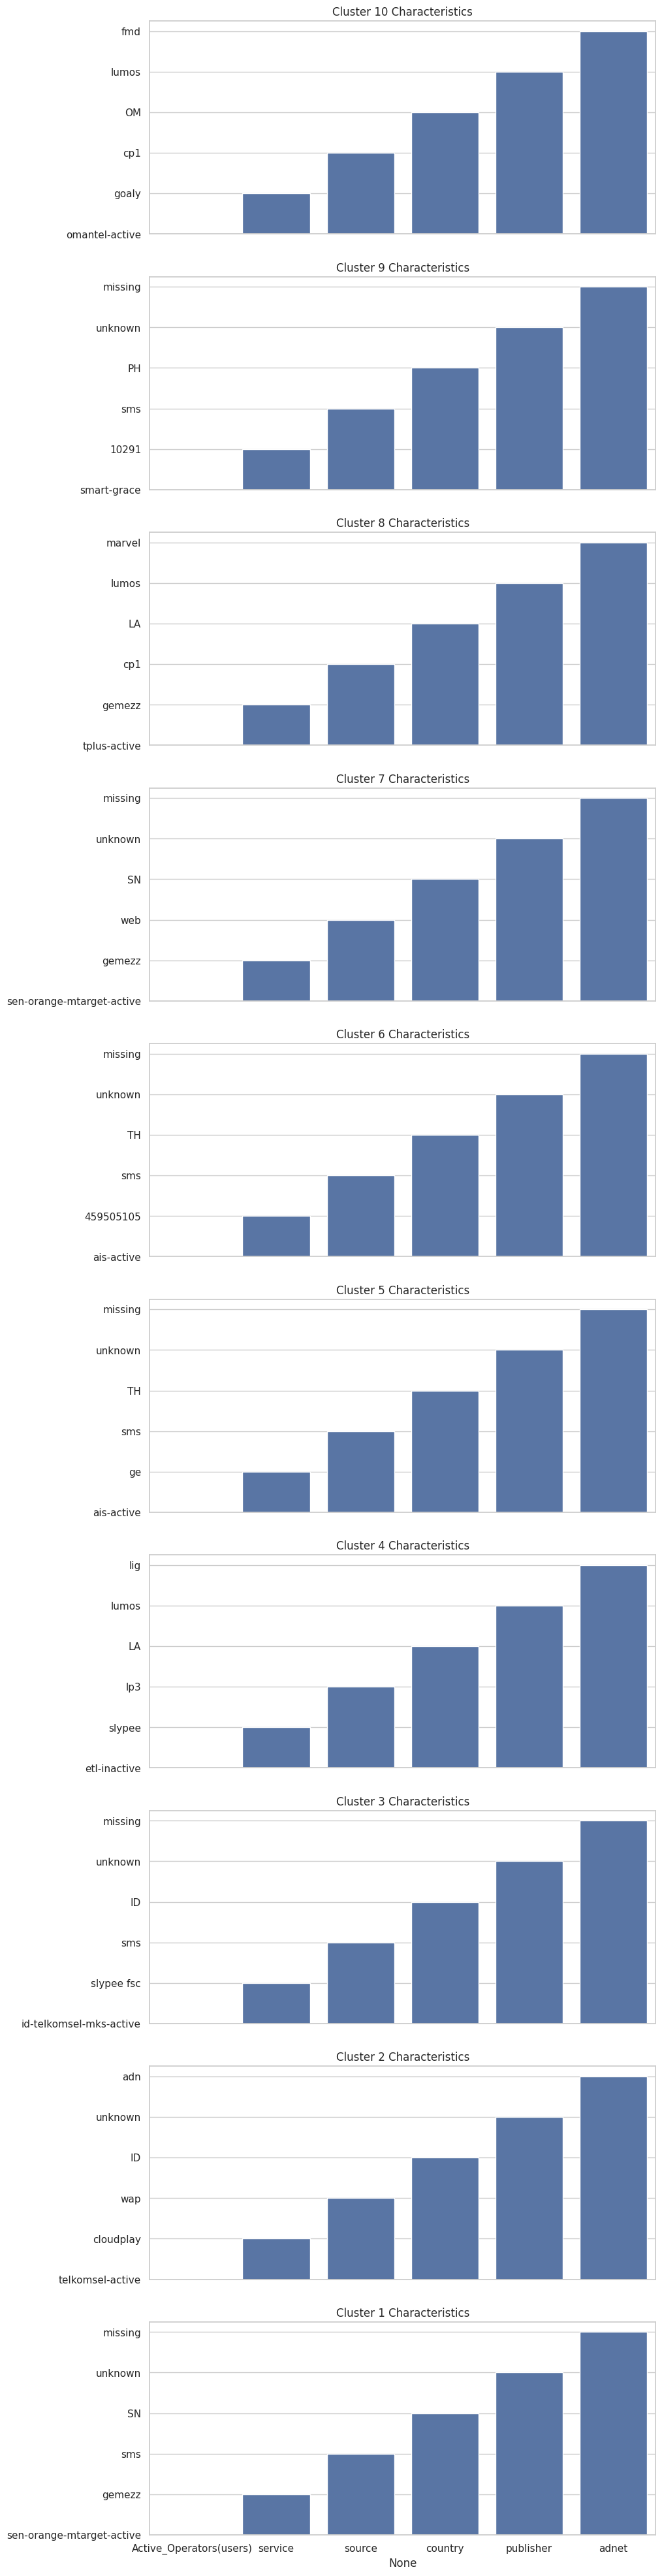

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_cluster_characteristics(result, number_clusters):

    fig, axes = plt.subplots(number_clusters, 1, figsize=(10, 5 * number_clusters), sharex=True)


    axes = axes[::-1]
    

    for i in range(number_clusters):
     
        cluster_data = result[result['clusters_assignments'] == i].drop(columns=['clusters_assignments'])
        

        mode_values = cluster_data.mode().iloc[0]
        
 
        sns.barplot(x=mode_values.index, y=mode_values.values, ax=axes[i])
        axes[i].set_title(f'Cluster {i + 1} Characteristics')
        
 
        axes[i].invert_yaxis()
    
    plt.show()


visualize_cluster_characteristics(result, number_clusters)


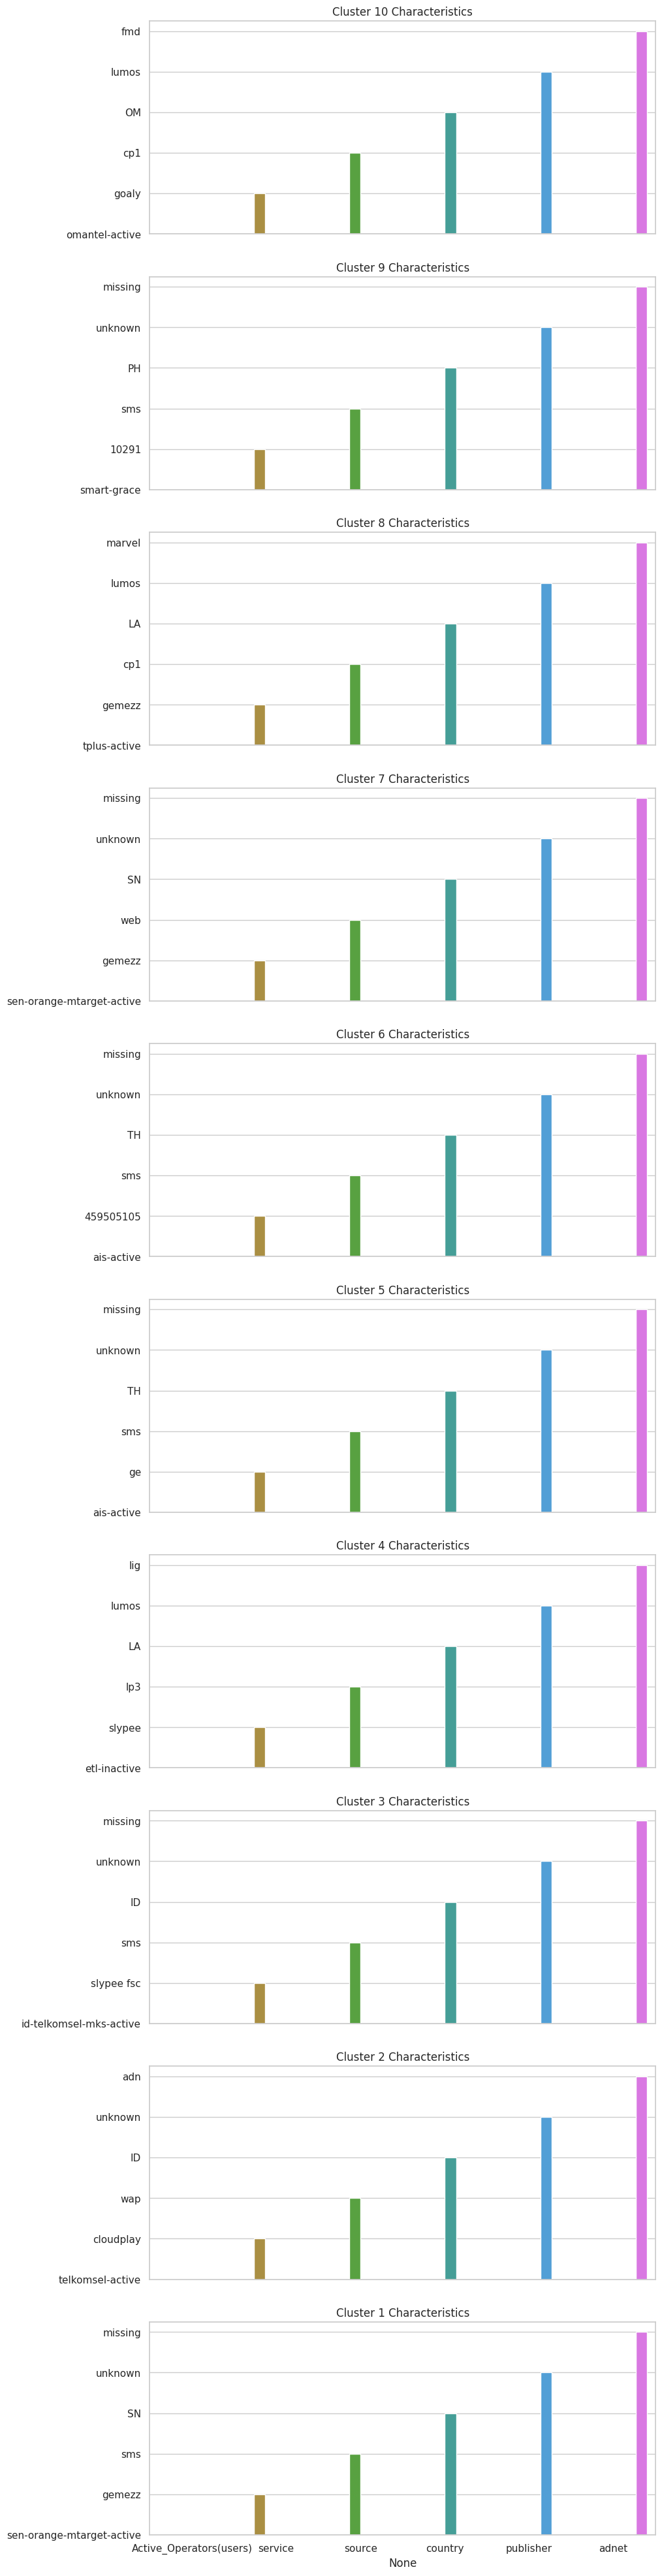

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_cluster_characteristics(result, number_clusters):
    # Set up subplots
    fig, axes = plt.subplots(number_clusters, 1, figsize=(10, 5 * number_clusters), sharex=True)

    # Reverse the order of axes to display from top to bottom
    axes = axes[::-1]
    
    # Loop through each cluster
    for i in range(number_clusters):
        # Extract data for the current cluster
        cluster_data = result[result['clusters_assignments'] == i].drop(columns=['clusters_assignments'])
        
        # Calculate mode for each column
        mode_values = cluster_data.mode().iloc[0]
        
        # Plot bar chart for each cluster with a different color for each bar
        sns.barplot(x=mode_values.index, y=mode_values.values, ax=axes[i], hue=mode_values.index, palette="husl", dodge=True, legend=False)
        axes[i].set_title(f'Cluster {i + 1} Characteristics')
        
        # Reverse the y-axis
        axes[i].invert_yaxis()
    
    plt.show()

# Call the function to visualize cluster characteristics
visualize_cluster_characteristics(result, number_clusters)


/tmp/ipykernel_5542/2159024824.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_values.values, y=mode_values.index, ax=axes[i, 0], palette="husl", dodge=True)
/tmp/ipykernel_5542/2159024824.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_values.values, y=mode_values.index, ax=axes[i, 0], palette="husl", dodge=True)
/tmp/ipykernel_5542/2159024824.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_values.values, y=mode_values.index, ax=axes[i, 0], palette="husl", dodge=True)
/tmp/ipykernel_5542/2159024824.py:21:

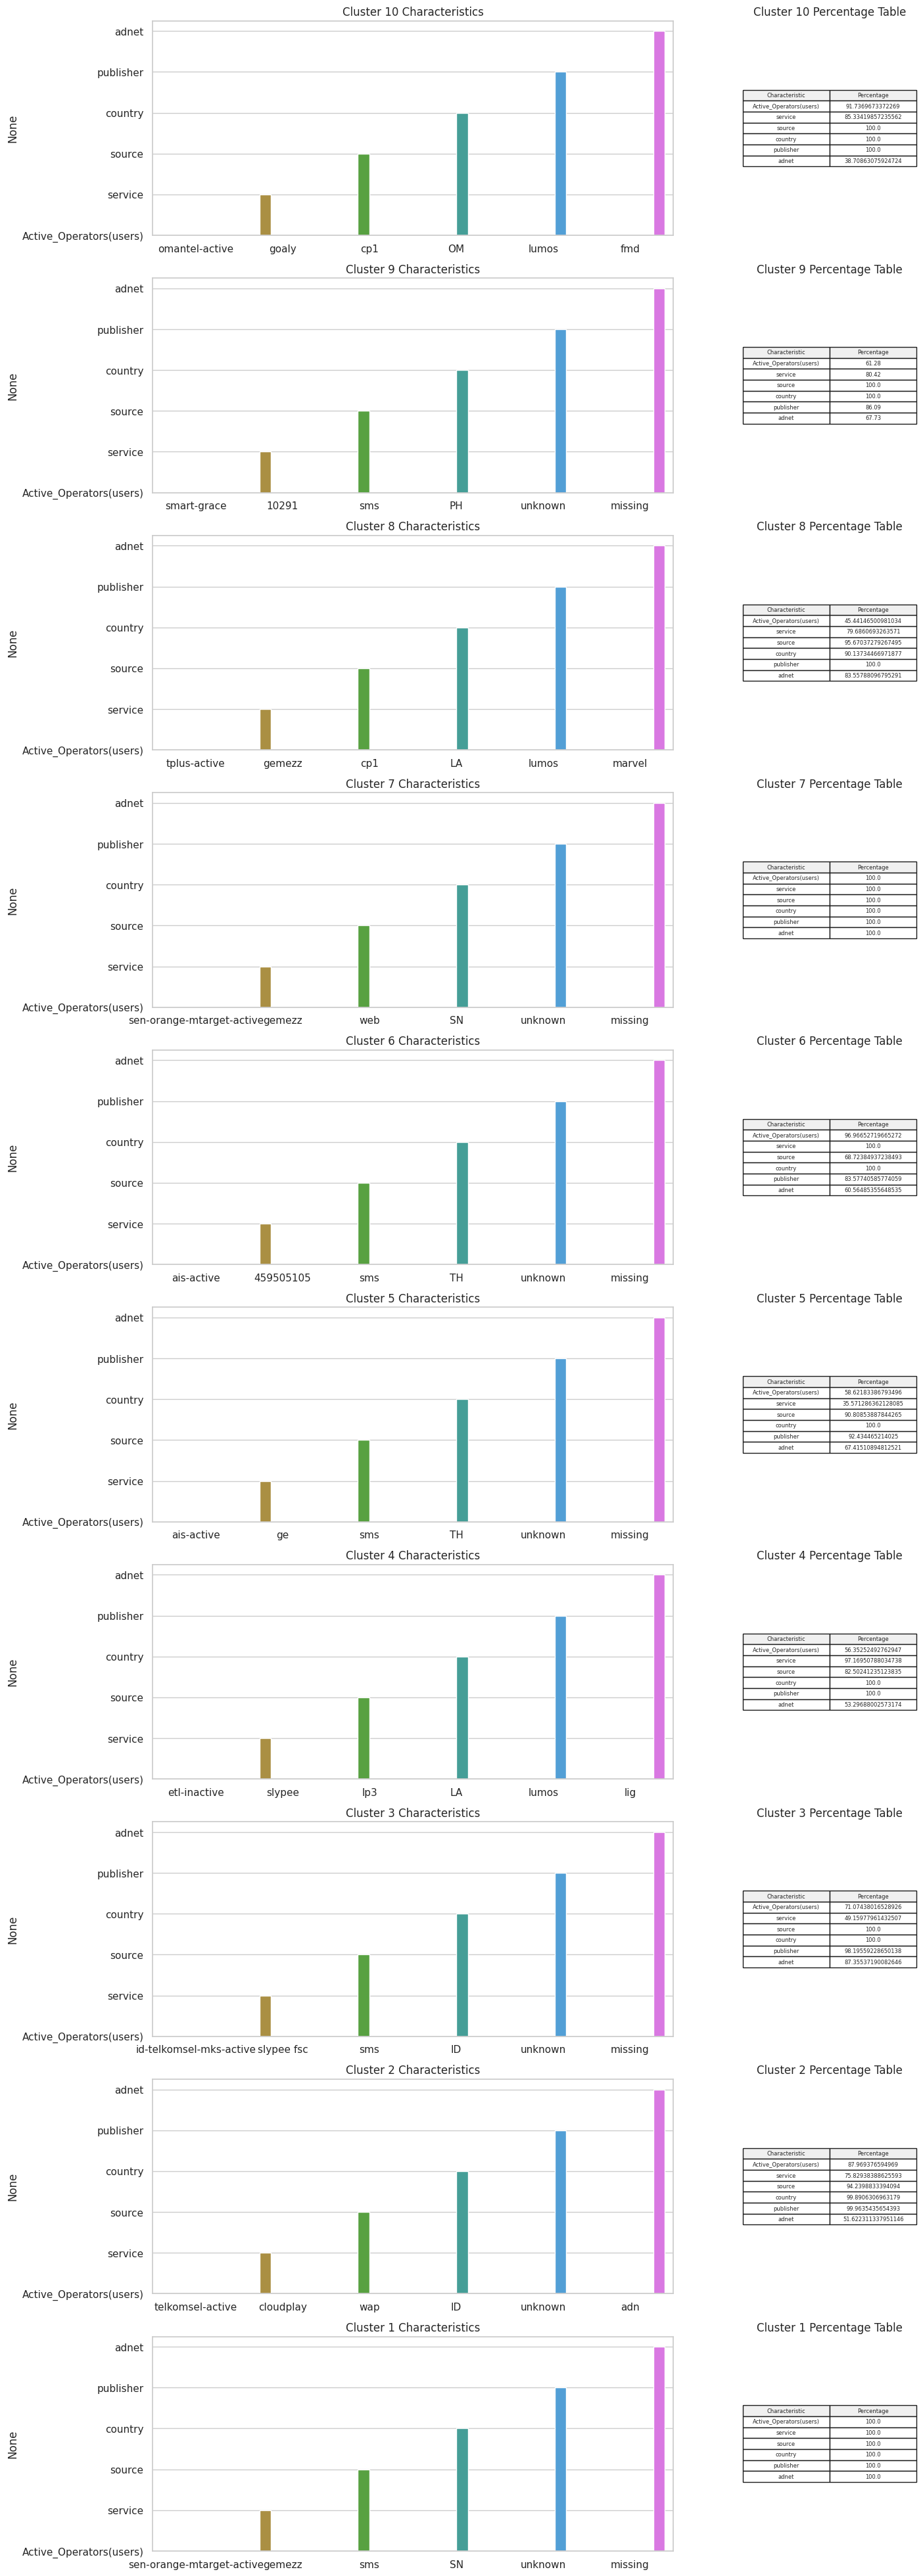

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_cluster_characteristics(result, number_clusters):
    # Set up subplots
    fig, axes = plt.subplots(number_clusters, 2, figsize=(15, 5 * number_clusters), gridspec_kw={'width_ratios': [3, 1]})

    # Reverse the order of axes to display from top to bottom
    axes = axes[::-1]

    # Loop through each cluster
    for i in range(number_clusters):
        # Extract data for the current cluster
        cluster_data = result[result['clusters_assignments'] == i].drop(columns=['clusters_assignments'])

        # Calculate mode for each column
        mode_values = cluster_data.mode().iloc[0]

        # Plot bar chart for each cluster with a different color for each bar
        sns.barplot(x=mode_values.values, y=mode_values.index, ax=axes[i, 0], palette="husl", dodge=True)
        axes[i, 0].set_title(f'Cluster {i + 1} Characteristics')
        axes[i, 0].invert_yaxis()

        # Create a table for percentage of each characteristic in the cluster
        table_data = pd.DataFrame({'Characteristic': mode_values.index, 'Percentage': cluster_data[mode_values.index].apply(lambda x: x.value_counts(normalize=True).iloc[0]*100)})
        table = axes[i, 1].table(cellText=table_data.values, colLabels=['Characteristic', 'Percentage'], loc='center', cellLoc='center', colColours=['#f0f0f0', '#f0f0f0'])
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f'Cluster {i + 1} Percentage Table')

    plt.show()

# Call the function to visualize cluster characteristics
visualize_cluster_characteristics(result, number_clusters)


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [56]:
df_encoded = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'O' else x)

In [57]:
y = df['success_billing'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop('success_billing', axis=1)



In [58]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
#preprocessing incase we forgot to convert some datatypes
numeric_features=X.select_dtypes(include=['int64', 'float64']).columns
categorical_features=X.select_dtypes(include=['object']).columns



In [60]:
#using Pipelie to to scale features using StandardScaler and incase we forgot to handle mising values for some numerical columns to 
#impute them with the mean
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [61]:
#Encoding all the categoricalvariables using one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])